In [1]:
import pandas as pd
import numpy as np

use data from data v 4.0.0 / preprocessed data

In [15]:
tweets_df_cs = pd.read_csv('/content/Tweets-CES-Preprocessed.csv')
tweets_df_ps = pd.read_csv('/content/Tweets-PES-Preprocessed.csv')
tweets_df_vs = pd.read_csv('/content/Tweets-VS-Preprocessed.csv')

## Transformers Model


In [3]:
!pip install -q transformers

     |████████████████████████████████| 4.4 MB 5.0 MB/s 
     |████████████████████████████████| 101 kB 10.1 MB/s 
     |████████████████████████████████| 6.6 MB 32.4 MB/s 
     |████████████████████████████████| 596 kB 49.6 MB/s 


In [4]:
!pip install -q emoji

     |████████████████████████████████| 175 kB 5.2 MB/s 


In [5]:
from transformers import pipeline

In [6]:
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

In [16]:
data = tweets_df_cs['text'][0]

In [17]:
data

'A little good news. The Sumatran rhinoceros are critically endangered, with perhaps a total of 80 adults dwelling in the forests of Sumatra. They are very hard to find.\n\nNow a baby rhino has been born in Way-Kambas-Nationalpark! The first in a long time. \n\n#Climate #nature'

In [18]:
sentiment_pipeline(data)

[{'label': 'POSITIVE', 'score': 0.993760883808136}]

In [10]:
specific_model = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")


Downloading:   0%|          | 0.00/1.13k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/890 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/515M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/295 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/824k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/17.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [19]:
specific_model(data)

[{'label': 'NEU', 'score': 0.7893244624137878}]

In [ ]:
# def get_sentiment(text):
#   res = sentiment_pipeline(text)
#   return res[0]['label']

# def get_score(text):
#   res = sentiment_pipeline(text)
#   return res[0]['score']

In [20]:
tweets_df_cs['text']

0      A little good news. The Sumatran rhinoceros ar...
1      A little good news. The Sumatran rhinoceros ar...
2      A little good news. The Sumatran rhinoceros ar...
3      Sumatran Rhinoceros has his smile camera ready...
4      @burtonlim Hi Mr. Lim, I wanted to explore don...
                             ...                        
441    Another Sumatran elephant found dead, again by...
442    I cannot believe it, that's the Sumatran Eleph...
443    Sumatran #Elephants are rapidly disappearing, ...
444    Sumatran Elephant: considered to be the smalle...
445    There are 3 types of subspecies of Asian Eleph...
Name: text, Length: 446, dtype: object

In [21]:
tweets_df_cs[tweets_df_cs['total_len'] == 0]

,Unnamed: 0,Unnamed: 0.1,user_name,user_description,user_location,user_verification,date,text,hashtags,source,retweets,preprocess_txt,total_len


In [22]:
def get_sentiment(text):
  if text == None or len(text) <= 0:
    return None
  try:
    res = specific_model(text)
  except:
    res = []
  if len(res) > 0:
    return res[0]['label']
  return None

def get_score(text):
  if text == None or len(text) <= 0:
    return None
  try:
    res = specific_model(text)
  except:
    res = []
  if len(res) > 0:
    return res[0]['score']
  return None

##Crtically Endangered Species

In [23]:
tweets_df_cs['sentiment'] = tweets_df_cs['text'].apply(lambda x: get_sentiment(x))



Token indices sequence length is longer than the specified maximum sequence length for this model (136 > 128). Running this sequence through the model will result in indexing errors


In [24]:
tweets_df_cs['score'] = tweets_df_cs['text'].apply(lambda x: get_score(x))

In [25]:
tweets_df_cs.head()

,Unnamed: 0,Unnamed: 0.1,user_name,user_description,user_location,user_verification,date,text,hashtags,source,retweets,preprocess_txt,total_len,sentiment,score
0,0,0,PanfilLera,NaN,NaN,False,2022-06-20 02:22:32,A little good news. The Sumatran rhinoceros ar...,NaN,Twitter Web App,1,"['little', 'good', 'news', 'sumatran', 'rhinoc...",26,NEU,0.789324
1,1,1,GehlhausenLarhonda,NaN,NaN,False,2022-06-20 02:10:38,A little good news. The Sumatran rhinoceros ar...,NaN,Twitter Web App,0,"['little', 'good', 'news', 'sumatran', 'rhinoc...",26,NEU,0.789324
2,2,2,Mike Hudema,#Climate Campaigner focusing on addressing the...,Unceded Squamish Territory,True,2022-06-17 23:32:03,A little good news. The Sumatran rhinoceros ar...,NaN,Buffer,279,"['little', 'good', 'news', 'sumatran', 'rhinoc...",30,NEU,0.798859
3,3,3,OPH Rescue,OPH Rescue brings dogs and cats from overcrowd...,"VA, DC, MD, PA",False,2022-06-16 15:14:45,Sumatran Rhinoceros has his smile camera ready...,NaN,Twitter Web App,4,"['sumatran', 'rhinoceros', 'smile', 'camera', ...",25,POS,0.983316
4,4,4,Sudan the Rhino fans,"Sudan, the last male Northern White Rhino, is ...",Canada,False,2022-06-14 16:13:38,"@burtonlim Hi Mr. Lim, I wanted to explore don...",NaN,Twitter for iPad,0,"['burtonlim', 'hi', 'mr', 'lim', 'wanted', 'ex...",17,POS,0.972695


In [26]:
tweets_df_cs['sentiment'].value_counts()

NEU    199
POS    133
NEG    110
Name: sentiment, dtype: int64

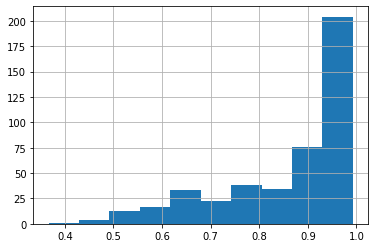

In [27]:
tweets_df_cs['score'].hist()

##Possibly Extinct Species

In [28]:
tweets_df_ps['sentiment'] = tweets_df_ps['text'].apply(lambda x: get_sentiment(x))

In [29]:
tweets_df_ps['score'] = tweets_df_ps['text'].apply(lambda x: get_score(x))

In [30]:
tweets_df_ps.head()

,Unnamed: 0,Unnamed: 0.1,user_name,user_description,user_location,user_verification,date,text,hashtags,source,retweets,preprocess_txt,total_len,sentiment,score
0,0,0,JustinBonanza,random mash-up of @justinbieber @jtimberlake @...,NaN,False,2022-06-23 03:26:34,Syria made history launching Does Northern whi...,NaN,avmtest,0,"['syria', 'made', 'history', 'launching', 'nor...",7,NEU,0.742124
1,1,1,Makio Gaminor,Artist / Conservationist 🥑 I make art about t...,A place with a nice breeze,False,2022-06-20 03:28:08,The northern white rhinoceros is on the verge ...,NaN,Twitter Web App,2,"['northern', 'white', 'rhinoceros', 'verge', '...",25,NEG,0.929749
2,2,2,Grimm Nevada,"Conservative, writer, artist, Common sense per...",NaN,False,2022-06-20 01:52:37,Here we see a touching photo of a male norther...,NaN,Twitter Web App,0,"['see', 'touching', 'photo', 'male', 'northern...",27,NEU,0.805733
3,3,3,Scientific Reports,Online & #openaccess. A primary research publi...,London,True,2022-06-16 11:35:48,"In their elegant study, @DrukkerMicha, Sebasti...",NaN,Twitter Web App,0,"['elegant', 'study', 'drukkermicha', 'sebastia...",26,POS,0.844703
4,4,4,Automated,Just a twitter bot who tweets a 𝓐𝓾𝓽𝓸𝓶𝓪𝓽𝓮𝓭 tweet,Automated,False,2022-06-23 09:13:24,"A Kouprey is never depressed , unless it is a ...",NaN,"Cheap Bots, Done Quick!",0,"['kouprey', 'never', 'depressed', 'unless', 'r...",6,NEU,0.805822


In [31]:
tweets_df_ps['sentiment'].value_counts()

NEU    24
NEG    12
POS     6
Name: sentiment, dtype: int64

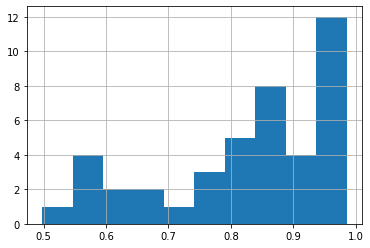

In [32]:
tweets_df_ps['score'].hist()

##Vulnerable Species

In [33]:
tweets_df_vs['sentiment'] = tweets_df_vs['text'].apply(lambda x: get_sentiment(x))

In [34]:
tweets_df_vs['score'] = tweets_df_vs['text'].apply(lambda x: get_score(x))

In [35]:
tweets_df_vs.head()

,Unnamed: 0,Unnamed: 0.1,user_name,user_description,user_location,user_verification,date,text,hashtags,source,retweets,preprocess_txt,total_len,sentiment,score
0,0,0,Not The Krookodile Hunter 🇲🇽,Hola seguidores. Estoy de incognita para que ...,"Richmond, CA",False,2022-06-22 10:48:30,@HarpyGoth Brad the Roseate Skimmer\nRyder the...,NaN,Twitter for Android,0,"['harpygoth', 'brad', 'roseate', 'skimmer', 'r...",19,NEU,0.969914
1,1,1,Saravanakumar CS,NaN,NaN,False,2022-06-18 09:08:30,@save_pangolin @Vikash_BR @UtkarshSingh_ fucki...,NaN,Twitter for Android,0,"['save', 'pangolin', 'vikash', 'br', 'utkarshs...",25,NEG,0.904970
2,2,2,The Left isn't divided the center is 🐌🍄🐙🦔😷🐌,"Lennonist dreamer, peacenik. Snark and sarcasm...",🐢🏝,False,2022-06-17 12:56:51,If there’s anyone around in 2622 maybe they’ll...,NaN,Twitter for iPhone,0,"['anyone', 'around', 'maybe', 'settle', 'pango...",18,NEU,0.959061
3,3,3,Phillip Templo Jr.,Pathology Residency Program Director @ https:/...,Manila: All views are my OWN,False,2022-06-23 17:23:47,@pripri_gosakto If they tell you once again na...,NaN,Twitter Web App,0,"['pripri', 'gosakto', 'tell', 'na', 'may', 'du...",14,NEU,0.953883
4,4,4,RENO🐊🐊,no way….he just ate my hair :3c,Your moms house,False,2022-06-23 16:16:45,@fizzygoop Well sucks to suck dugong I have a ...,NaN,Twitter for iPhone,0,"['fizzygoop', 'well', 'suck', 'suck', 'dugong'...",7,NEG,0.976291


In [36]:
tweets_df_vs['sentiment'].value_counts()

NEU    507
POS    189
NEG    140
Name: sentiment, dtype: int64

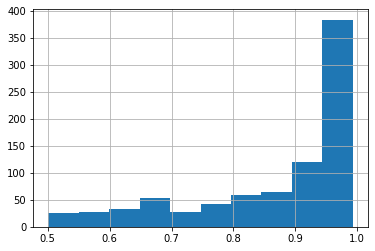

In [37]:
tweets_df_vs['score'].hist()

#Results and Analysis

## Sorting by Dates ascending

In [38]:
import matplotlib.pyplot as plt

In [39]:
Tweet_loc_cs = tweets_df_cs.sort_values(by='date', ascending=True)
Tweet_loc_ps = tweets_df_ps.sort_values(by='date', ascending=True)
Tweet_loc_vs = tweets_df_vs.sort_values(by='date', ascending=True)

In [40]:
Tweet_loc_cs.head()

,Unnamed: 0,Unnamed: 0.1,user_name,user_description,user_location,user_verification,date,text,hashtags,source,retweets,preprocess_txt,total_len,sentiment,score
74,74,74,AZA,"We are protectors, defenders and friends. \nWe...","Silver Spring, MD",True,2022-06-13 19:10:03,Congratulations to AZA Certified Related facil...,NaN,Hootsuite Inc.,5,"['congratulation', 'aza', 'certified', 'relate...",30,POS,0.959168
71,71,71,NatGeoMaps,"Since 1915, National Geographic Maps has been ...","Washington, DC | Evergreen, CO",False,2022-06-13 22:47:06,All 3 species of orangutans in Indonesia—Borne...,NaN,Sprinklr,8,"['specie', 'orangutan', 'indonesia', 'bornean'...",32,NEG,0.965117
73,73,73,S4V4NN4H💗💜💙,23•She/Her•ASD•ADHD•Self-Taught Small Artist•S...,NaN,False,2022-06-13 23:25:52,Eh I got Mina Mongoose.\n\nI rather be Bunnie ...,NaN,Twitter for iPhone,3,"['eh', 'got', 'mina', 'mongoose', 'rather', 'b...",15,NEU,0.950375
103,103,103,"""paw"" ""print"" buddy",im buddy she/her. time traffeler and essay wri...,fub free ☮,False,2022-06-14 00:10:22,@sonyaibo1234 ok now for my slightly more obsc...,NaN,Twitter Web App,0,"['sonyaibo', 'ok', 'slightly', 'obscure', 'fav...",29,NEU,0.600490
276,276,276,Nature and animals🌿😽🐶🐒🐰🐼🐥🐿️,Animals from China. The video comes from 抖音 an...,NaN,False,2022-06-14 01:12:23,Yangtze finless porpoise. https://t.co/LMuIkbPNwB,NaN,Twitter for Android,3,"['yangtze', 'finless', 'porpoise', 'http', 'co...",6,NEU,0.962956


## One hot Encode Sentiment Labels

In [41]:
Tweet_loc_cs['label'] = Tweet_loc_cs['sentiment']
Tweet_loc_ps['label'] = Tweet_loc_ps['sentiment']
Tweet_loc_vs['label'] = Tweet_loc_vs['sentiment']

In [42]:
def get_label(x):
  if x == 'POS':
    return 1
  elif x == 'NEU':
    return 0
  else:
    return -1

In [43]:
Tweet_loc_cs['sentiment'] = Tweet_loc_cs['sentiment'].apply(lambda x : get_label(x))
Tweet_loc_ps['sentiment'] = Tweet_loc_ps['sentiment'].apply(lambda x : get_label(x))
Tweet_loc_vs['sentiment'] = Tweet_loc_vs['sentiment'].apply(lambda x : get_label(x))

In [44]:
Tweet_loc_cs.head()

,Unnamed: 0,Unnamed: 0.1,user_name,user_description,user_location,user_verification,date,text,hashtags,source,retweets,preprocess_txt,total_len,sentiment,score,label
74,74,74,AZA,"We are protectors, defenders and friends. \nWe...","Silver Spring, MD",True,2022-06-13 19:10:03,Congratulations to AZA Certified Related facil...,NaN,Hootsuite Inc.,5,"['congratulation', 'aza', 'certified', 'relate...",30,1,0.959168,POS
71,71,71,NatGeoMaps,"Since 1915, National Geographic Maps has been ...","Washington, DC | Evergreen, CO",False,2022-06-13 22:47:06,All 3 species of orangutans in Indonesia—Borne...,NaN,Sprinklr,8,"['specie', 'orangutan', 'indonesia', 'bornean'...",32,-1,0.965117,NEG
73,73,73,S4V4NN4H💗💜💙,23•She/Her•ASD•ADHD•Self-Taught Small Artist•S...,NaN,False,2022-06-13 23:25:52,Eh I got Mina Mongoose.\n\nI rather be Bunnie ...,NaN,Twitter for iPhone,3,"['eh', 'got', 'mina', 'mongoose', 'rather', 'b...",15,0,0.950375,NEU
103,103,103,"""paw"" ""print"" buddy",im buddy she/her. time traffeler and essay wri...,fub free ☮,False,2022-06-14 00:10:22,@sonyaibo1234 ok now for my slightly more obsc...,NaN,Twitter Web App,0,"['sonyaibo', 'ok', 'slightly', 'obscure', 'fav...",29,0,0.600490,NEU
276,276,276,Nature and animals🌿😽🐶🐒🐰🐼🐥🐿️,Animals from China. The video comes from 抖音 an...,NaN,False,2022-06-14 01:12:23,Yangtze finless porpoise. https://t.co/LMuIkbPNwB,NaN,Twitter for Android,3,"['yangtze', 'finless', 'porpoise', 'http', 'co...",6,0,0.962956,NEU


In [45]:
Tweet_loc_cs['sentiment'].value_counts()

 0    199
 1    133
-1    114
Name: sentiment, dtype: int64

In [46]:
Tweet_loc_ps['sentiment'].value_counts()

 0    24
-1    13
 1     6
Name: sentiment, dtype: int64

In [47]:
Tweet_loc_vs['sentiment'].value_counts()

 0    507
 1    189
-1    147
Name: sentiment, dtype: int64

## Clustering Sentiments based on day

In [48]:
Tweet_loc_cs.shape

(446, 16)

In [49]:
Tweet_loc_cs['date'][0]

'2022-06-20 02:22:32'

In [50]:
dc_cs = dict()
dc_ps = dict()
dc_vs = dict()

In [51]:
for date in Tweet_loc_cs['date']:
  dc_cs[date[:10]] = {'pos': 0,
                   'neg': 0,
                   'neu': 0}


for date in Tweet_loc_ps['date']:
  dc_ps[date[:10]] = {'pos': 0,
                   'neg': 0,
                   'neu': 0}


for date in Tweet_loc_vs['date']:
  dc_vs[date[:10]] = {'pos': 0,
                   'neg': 0,
                   'neu': 0}


In [52]:
dc_cs

{'2022-06-13': {'neg': 0, 'neu': 0, 'pos': 0},
 '2022-06-14': {'neg': 0, 'neu': 0, 'pos': 0},
 '2022-06-15': {'neg': 0, 'neu': 0, 'pos': 0},
 '2022-06-16': {'neg': 0, 'neu': 0, 'pos': 0},
 '2022-06-17': {'neg': 0, 'neu': 0, 'pos': 0},
 '2022-06-18': {'neg': 0, 'neu': 0, 'pos': 0},
 '2022-06-19': {'neg': 0, 'neu': 0, 'pos': 0},
 '2022-06-20': {'neg': 0, 'neu': 0, 'pos': 0},
 '2022-06-21': {'neg': 0, 'neu': 0, 'pos': 0},
 '2022-06-22': {'neg': 0, 'neu': 0, 'pos': 0},
 '2022-06-23': {'neg': 0, 'neu': 0, 'pos': 0}}

In [53]:
dc_ps

{'2022-06-15': {'neg': 0, 'neu': 0, 'pos': 0},
 '2022-06-16': {'neg': 0, 'neu': 0, 'pos': 0},
 '2022-06-17': {'neg': 0, 'neu': 0, 'pos': 0},
 '2022-06-18': {'neg': 0, 'neu': 0, 'pos': 0},
 '2022-06-19': {'neg': 0, 'neu': 0, 'pos': 0},
 '2022-06-20': {'neg': 0, 'neu': 0, 'pos': 0},
 '2022-06-21': {'neg': 0, 'neu': 0, 'pos': 0},
 '2022-06-22': {'neg': 0, 'neu': 0, 'pos': 0},
 '2022-06-23': {'neg': 0, 'neu': 0, 'pos': 0}}

In [54]:
dc_vs

{'2022-06-14': {'neg': 0, 'neu': 0, 'pos': 0},
 '2022-06-15': {'neg': 0, 'neu': 0, 'pos': 0},
 '2022-06-16': {'neg': 0, 'neu': 0, 'pos': 0},
 '2022-06-17': {'neg': 0, 'neu': 0, 'pos': 0},
 '2022-06-18': {'neg': 0, 'neu': 0, 'pos': 0},
 '2022-06-19': {'neg': 0, 'neu': 0, 'pos': 0},
 '2022-06-20': {'neg': 0, 'neu': 0, 'pos': 0},
 '2022-06-21': {'neg': 0, 'neu': 0, 'pos': 0},
 '2022-06-22': {'neg': 0, 'neu': 0, 'pos': 0},
 '2022-06-23': {'neg': 0, 'neu': 0, 'pos': 0}}

In [55]:
for i in range(Tweet_loc_cs.shape[0]):
  date = Tweet_loc_cs['date'][i][:10]
  senti = Tweet_loc_cs['sentiment'][i]
  if senti == 1:
    dc_cs[date]['pos'] += 1
  elif senti == -1:
    dc_cs[date]['neg'] += 1
  else:
    dc_cs[date]['neu'] += 1




for i in range(Tweet_loc_ps.shape[0]):
  date = Tweet_loc_ps['date'][i][:10]
  senti = Tweet_loc_ps['sentiment'][i]
  if senti == 1:
    dc_ps[date]['pos'] += 1
  elif senti == -1:
    dc_ps[date]['neg'] += 1
  else:
    dc_ps[date]['neu'] += 1




for i in range(Tweet_loc_vs.shape[0]):
  date = Tweet_loc_vs['date'][i][:10]
  senti = Tweet_loc_vs['sentiment'][i]
  if senti == 1:
    dc_vs[date]['pos'] += 1
  elif senti == -1:
    dc_vs[date]['neg'] += 1
  else:
    dc_vs[date]['neu'] += 1

In [56]:
dc_cs

{'2022-06-13': {'neg': 1, 'neu': 1, 'pos': 1},
 '2022-06-14': {'neg': 7, 'neu': 11, 'pos': 5},
 '2022-06-15': {'neg': 5, 'neu': 12, 'pos': 3},
 '2022-06-16': {'neg': 4, 'neu': 7, 'pos': 5},
 '2022-06-17': {'neg': 10, 'neu': 15, 'pos': 6},
 '2022-06-18': {'neg': 6, 'neu': 6, 'pos': 3},
 '2022-06-19': {'neg': 8, 'neu': 10, 'pos': 6},
 '2022-06-20': {'neg': 18, 'neu': 23, 'pos': 16},
 '2022-06-21': {'neg': 21, 'neu': 38, 'pos': 25},
 '2022-06-22': {'neg': 20, 'neu': 37, 'pos': 29},
 '2022-06-23': {'neg': 14, 'neu': 39, 'pos': 34}}

In [57]:
dc_ps

{'2022-06-15': {'neg': 0, 'neu': 1, 'pos': 0},
 '2022-06-16': {'neg': 0, 'neu': 0, 'pos': 1},
 '2022-06-17': {'neg': 0, 'neu': 1, 'pos': 0},
 '2022-06-18': {'neg': 2, 'neu': 1, 'pos': 0},
 '2022-06-19': {'neg': 0, 'neu': 4, 'pos': 1},
 '2022-06-20': {'neg': 4, 'neu': 4, 'pos': 0},
 '2022-06-21': {'neg': 4, 'neu': 3, 'pos': 4},
 '2022-06-22': {'neg': 2, 'neu': 6, 'pos': 0},
 '2022-06-23': {'neg': 1, 'neu': 4, 'pos': 0}}

In [58]:
dc_vs

{'2022-06-14': {'neg': 2, 'neu': 17, 'pos': 5},
 '2022-06-15': {'neg': 2, 'neu': 17, 'pos': 6},
 '2022-06-16': {'neg': 6, 'neu': 27, 'pos': 6},
 '2022-06-17': {'neg': 9, 'neu': 25, 'pos': 12},
 '2022-06-18': {'neg': 5, 'neu': 34, 'pos': 8},
 '2022-06-19': {'neg': 4, 'neu': 15, 'pos': 3},
 '2022-06-20': {'neg': 13, 'neu': 34, 'pos': 13},
 '2022-06-21': {'neg': 10, 'neu': 47, 'pos': 23},
 '2022-06-22': {'neg': 16, 'neu': 87, 'pos': 38},
 '2022-06-23': {'neg': 80, 'neu': 204, 'pos': 75}}

In [59]:
for k in dc_cs:
  print(k)

2022-06-13
2022-06-14
2022-06-15
2022-06-16
2022-06-17
2022-06-18
2022-06-19
2022-06-20
2022-06-21
2022-06-22
2022-06-23


In [60]:
neg_cs = []
pos_cs = []
neu_cs = []
dates_cs = []

for k in dc_cs:
  dates_cs.append(k)
  v = dc_cs[k]
  neg_cs.append(v['neg'])
  pos_cs.append(v['pos'])
  neu_cs.append(v['neu'])



neg_ps = []
pos_ps = []
neu_ps = []
dates_ps = []

for k in dc_ps:
  dates_ps.append(k)
  v = dc_ps[k]
  neg_ps.append(v['neg'])
  pos_ps.append(v['pos'])
  neu_ps.append(v['neu'])



neg_vs = []
pos_vs = []
neu_vs = []
dates_vs = []

for k in dc_vs:
  dates_vs.append(k)
  v = dc_vs[k]
  neg_vs.append(v['neg'])
  pos_vs.append(v['pos'])
  neu_vs.append(v['neu'])


## Plots for sentiments vs dates

## Critically Endangered

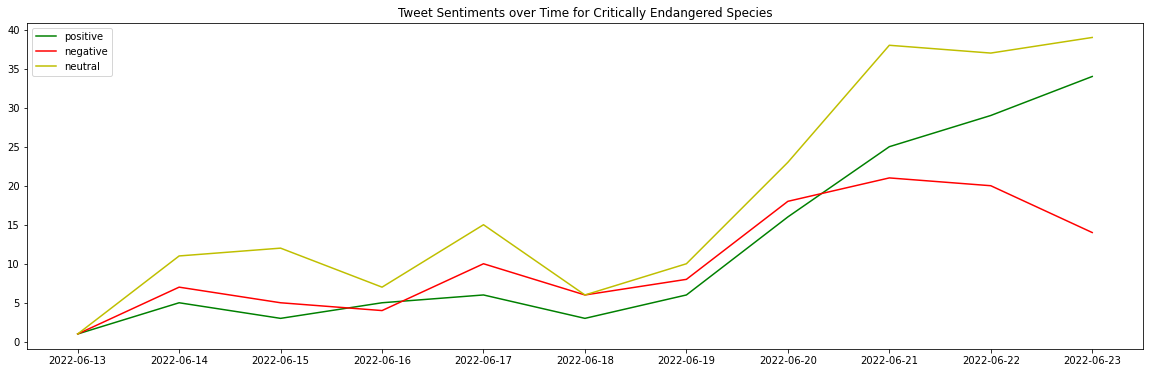

In [61]:
plt.figure(figsize=(20,6))
plt.plot(dates_cs,pos_cs,'g',label='positive')
plt.plot(dates_cs,neg_cs,'r',label='negative')
plt.plot(dates_cs,neu_cs,'y',label='neutral')
plt.title("Tweet Sentiments over Time for Critically Endangered Species")
plt.legend()
plt.show()

In [62]:
import numpy as np

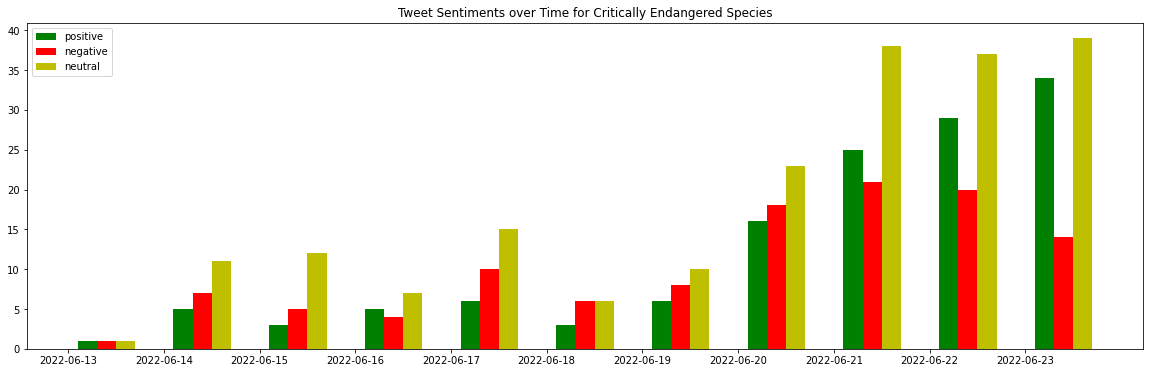

In [63]:
xaxis = np.arange(len(dates_cs))
plt.figure(figsize=(20,6))
plt.bar(xaxis+0.2,pos_cs,width=0.2,color='g',label='positive')
plt.bar(xaxis+0.2*2,neg_cs,width=0.2,color='r',label='negative')
plt.bar(xaxis+0.2*3,neu_cs,width=0.2,color='y',label='neutral')
plt.xticks(xaxis,dates_cs)
plt.title("Tweet Sentiments over Time for Critically Endangered Species")
plt.legend()
plt.show()

##Possibly Extinct

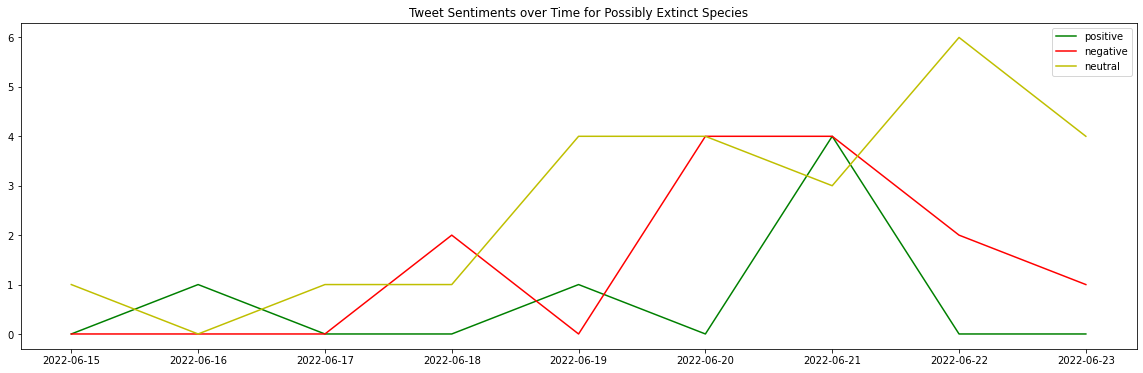

In [64]:
plt.figure(figsize=(20,6))
plt.plot(dates_ps,pos_ps,'g',label='positive')
plt.plot(dates_ps,neg_ps,'r',label='negative')
plt.plot(dates_ps,neu_ps,'y',label='neutral')
plt.title("Tweet Sentiments over Time for Possibly Extinct Species")
plt.legend()
plt.show()

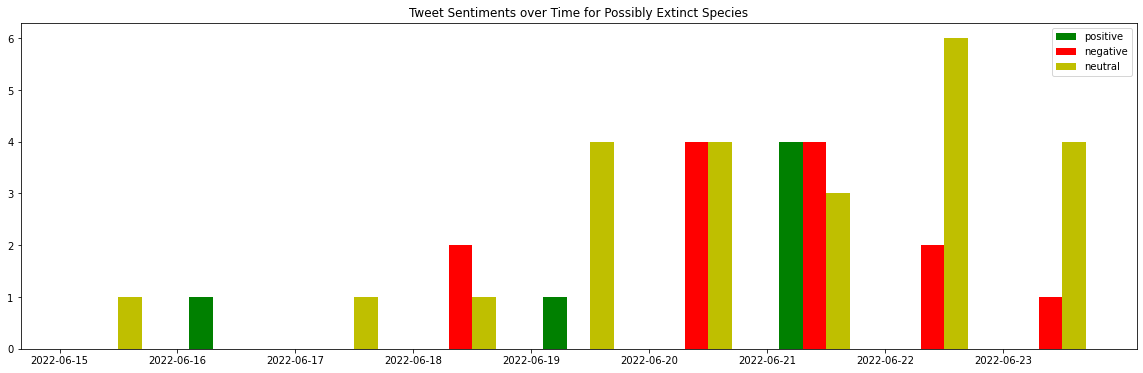

In [65]:
xaxis = np.arange(len(dates_ps))
plt.figure(figsize=(20,6))
plt.bar(xaxis+0.2,pos_ps,width=0.2,color='g',label='positive')
plt.bar(xaxis+0.2*2,neg_ps,width=0.2,color='r',label='negative')
plt.bar(xaxis+0.2*3,neu_ps,width=0.2,color='y',label='neutral')
plt.xticks(xaxis,dates_ps)
plt.title("Tweet Sentiments over Time for Possibly Extinct Species")
plt.legend()
plt.show()

##Vulnerable Species

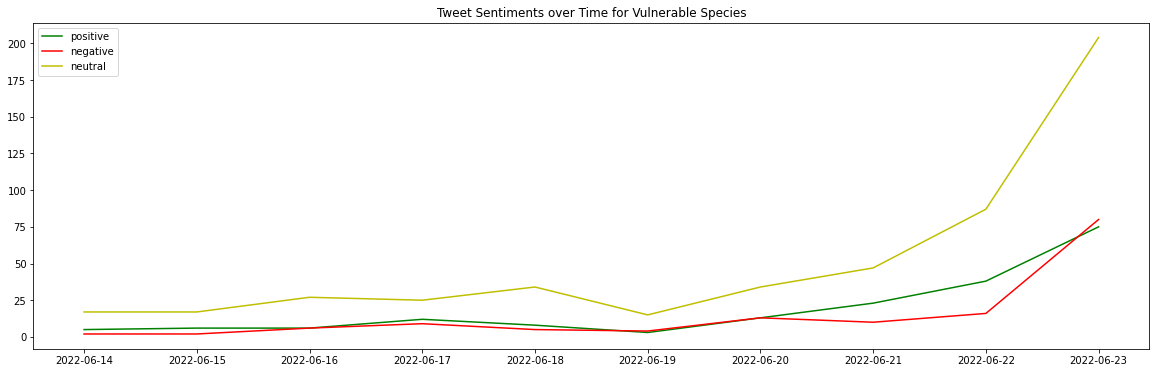

In [66]:
plt.figure(figsize=(20,6))
plt.plot(dates_vs,pos_vs,'g',label='positive')
plt.plot(dates_vs,neg_vs,'r',label='negative')
plt.plot(dates_vs,neu_vs,'y',label='neutral')
plt.title("Tweet Sentiments over Time for Vulnerable Species")
plt.legend()
plt.show()

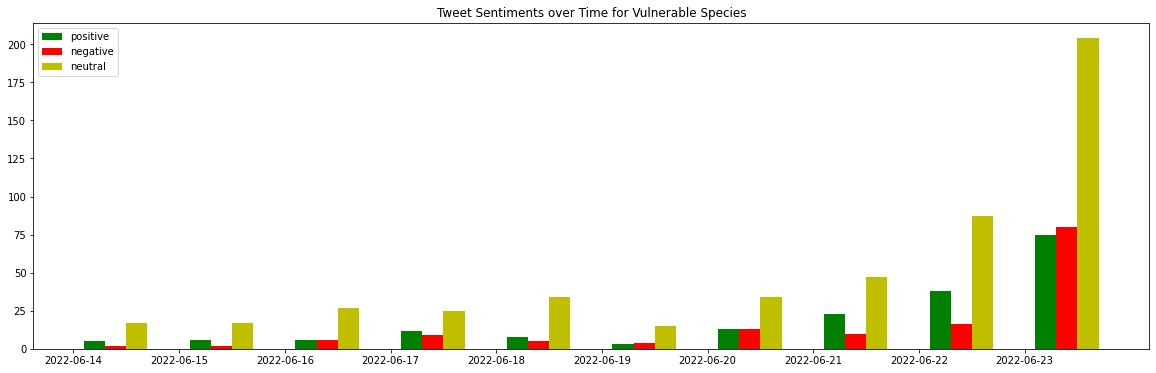

In [67]:
xaxis = np.arange(len(dates_vs))
plt.figure(figsize=(20,6))
plt.bar(xaxis+0.2,pos_vs,width=0.2,color='g',label='positive')
plt.bar(xaxis+0.2*2,neg_vs,width=0.2,color='r',label='negative')
plt.bar(xaxis+0.2*3,neu_vs,width=0.2,color='y',label='neutral')
plt.xticks(xaxis,dates_vs)
plt.title("Tweet Sentiments over Time for Vulnerable Species")
plt.legend()
plt.show()

#Sentiment Examples

In [69]:
post = tweets_df_cs[tweets_df_cs['sentiment']=='POS']
negt = tweets_df_cs[tweets_df_cs['sentiment']=='NEG']
neut = tweets_df_cs[tweets_df_cs['sentiment']=='NEU']

In [71]:
post['text']

3      Sumatran Rhinoceros has his smile camera ready...
4      @burtonlim Hi Mr. Lim, I wanted to explore don...
9      @PlanetZooGame My favourite is Howletts Wildli...
18     The Eastern Lowland Gorilla can run faster tha...
19     Some of these efforts include actively protect...
                             ...                        
412    @CatherinBabault @MarmotRecovery @CanGeo @Jav_...
418    This #WorldRainforestDay we're celebrating the...
419    On #WorldRainforestDay, let's be grateful for ...
435    Happy Father's Day!\nMin (the girl) has two fa...
442    I cannot believe it, that's the Sumatran Eleph...
Name: text, Length: 133, dtype: object

In [72]:
negt['text']

5      Dicerorhinus sumatrensis harrissoni, also know...
17     The Eastern Lowland Gorilla never sleeps. Also...
21     The Eastern Lowland Gorilla will drown if kept...
23     The Cross River Gorilla can’t eat hay. https:/...
30     The Cross River Gorilla will drown if kept und...
                             ...                        
434    @louisa1000 @ErikSolheim Wow, how much do you ...
437    @QinduoXu What troubles me is the similarity o...
438    The Chinese with their long History should rea...
441    Another Sumatran elephant found dead, again by...
443    Sumatran #Elephants are rapidly disappearing, ...
Name: text, Length: 110, dtype: object

In [73]:
neut['text']

0      A little good news. The Sumatran rhinoceros ar...
1      A little good news. The Sumatran rhinoceros ar...
2      A little good news. The Sumatran rhinoceros ar...
6      Dicerorhinus sumatrensis sumatrensis, also kno...
7      Dicerohinus sumatrensis lasiotis, also known a...
                             ...                        
436    Only thing the Chinese have not been forthcomi...
439    @RepTenney 😱😭 Now that everyone believe the st...
440    July 6, 2017- The last remaining Elephas maxim...
444    Sumatran Elephant: considered to be the smalle...
445    There are 3 types of subspecies of Asian Eleph...
Name: text, Length: 199, dtype: object